In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
import zipfile
zf= zipfile.ZipFile('events.csv.zip')
events= pd.read_csv(zf.open('events.csv'))
print events.shape
events.head()

(3252950, 5)


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


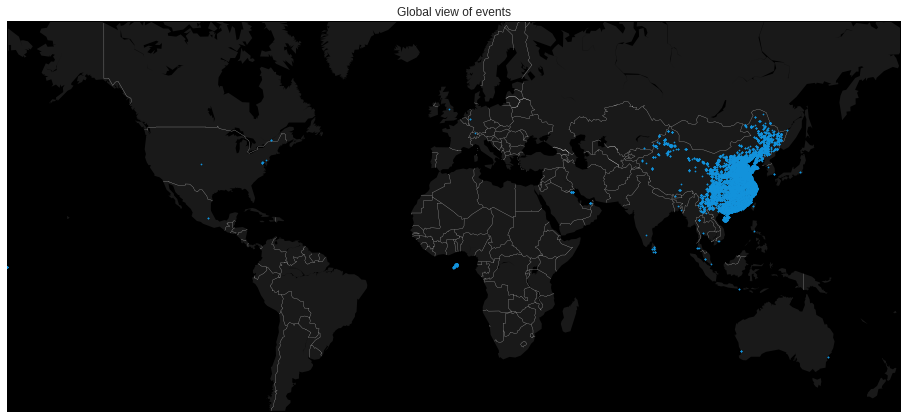

In [3]:
# Set up plot
events_sample = events.sample(n=100000)
plt.figure(1, figsize=(16,8))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-50,
             urcrnrlat=70,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(events_sample["longitude"].tolist(), events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

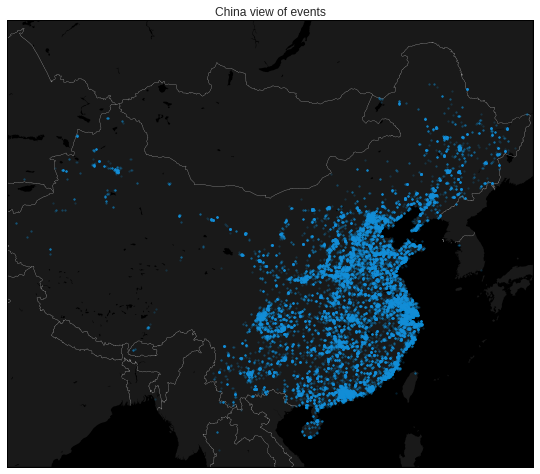

In [4]:
# Sample it down to only the China region
lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

idx_china = (events["longitude"]>lon_min) &\
            (events["longitude"]<lon_max) &\
            (events["latitude"]>lat_min) &\
            (events["latitude"]<lat_max)

events_china = events[idx_china].sample(n=100000)

# Mercator of China
plt.figure(2, figsize=(16,8))

m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(events_china["longitude"].tolist(), events_china["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.2, zorder=5)

plt.title("China view of events")
plt.show()

In [5]:
zf= zipfile.ZipFile('gender_age_train.csv.zip')
train= pd.read_csv(zf.open('gender_age_train.csv'))
print train.shape
train.head()

(74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [6]:
events_china.head()

,event_id,device_id,timestamp,longitude,latitude
1975258,1975259,1779631023439405334,2016-05-07 18:08:11,114.26,30.57
1974537,1974538,2077358756823583387,2016-05-03 18:27:35,114.31,38.09
197885,197886,-5320544664470122582,2016-05-05 09:09:43,120.91,31.44
1832390,1832391,-1655846830070318405,2016-05-01 17:30:57,109.46,24.38
236414,236415,7760596308063695876,2016-05-03 21:00:34,104.03,30.64


In [7]:
events_gender= events.merge(train, how= 'inner', on= 'device_id')
print events.shape
print events_gender.shape

(3252950, 5)
(1215595, 8)


In [8]:
idx_china = (events_gender["longitude"]>lon_min) &\
            (events_gender["longitude"]<lon_max) &\
            (events_gender["latitude"]>lat_min) &\
            (events_gender["latitude"]<lat_max)
            
events_china_gender= events_gender[idx_china].sample(n= 100000)
#print events_china_gender.shape

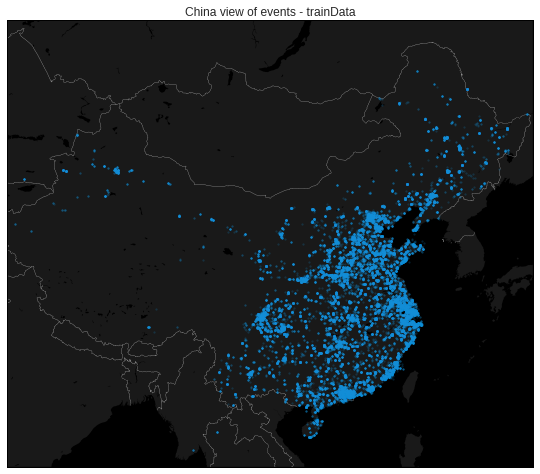

In [9]:
# Mercator of China
plt.figure(3, figsize=(16,8))

m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.2, color="w")              # thin white line for country borders

# Plot the data
mxy = m3(events_china_gender["longitude"].tolist(), events_china_gender["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.2, zorder=5)

plt.title("China view of events - trainData")
plt.show()

In [10]:
events_china_gender.gender.value_counts()

M    72820
F    27180
Name: gender, dtype: int64

In [11]:
events_china_male= events_china_gender[events_china_gender.gender== 'M']
events_china_female= events_china_gender[events_china_gender.gender== 'F']
print events_china_male.shape
print events_china_female.shape

(72820, 8)
(27180, 8)


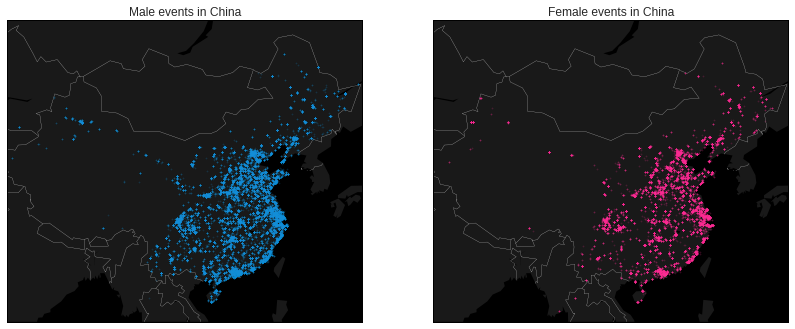

In [13]:
plt.figure(4, figsize= (14,7))

#put male on the left subplot
plt.subplot(121)
m4= Basemap(projection='merc',
           llcrnrlat= lat_min,
           urcrnrlat= lat_max,
           llcrnrlon= lon_min,
           urcrnrlon= lon_max,
           lat_ts= 30,
           resolution= 'c')
m4.fillcontinents(color= '#191919', lake_color= '#000000')
m4.drawmapboundary(fill_color= '#000000')
m4.drawcountries(linewidth= 0.2, color= 'w')

mxy= m4(events_china_male['longitude'].tolist(), events_china_male['latitude'].tolist())
m4.scatter(mxy[0], mxy[1], s= 3, c= '#1292db', lw= 0, alpha= 0.2, zorder= 5)
plt.title('Male events in China')

#put female on the right subplot
plt.subplot(122)
m4= Basemap(projection='merc',
           llcrnrlat= lat_min,
           urcrnrlat= lat_max,
           llcrnrlon= lon_min,
           urcrnrlon= lon_max,
           lat_ts= 30,
           resolution= 'c')
m4.fillcontinents(color= '#191919', lake_color= '#000000')
m4.drawmapboundary(fill_color= '#000000')
m4.drawcountries(linewidth= 0.2, color= 'w')

mxy= m4(events_china_female['longitude'].tolist(), events_china_female['latitude'].tolist())
m4.scatter(mxy[0], mxy[1], s= 3, c= '#fd3096', lw= 0, alpha= 0.2, zorder= 5)
plt.title('Female events in China')

plt.show()

In [16]:
events_train= events.merge(train, how= 'inner', on= 'device_id')
print events_train.shape
events_train.head()

(1215595, 8)


,event_id,device_id,timestamp,longitude,latitude,gender,age,group
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+


In [17]:
events_train.group.value_counts()

M39+      211020
M32-38    210708
M29-31    140747
M23-26    138526
M27-28     88984
F33-42     88034
F43+       75376
M22-       74318
F29-32     56863
F24-26     45314
F23-       44497
F27-28     41208
Name: group, dtype: int64

In [22]:
#lets make a function out of this

def regionalGenderPlot(lat_min, lat_max, lon_min, lon_max, pltData= events_train, samp_size= 100000):
    
    idx_region = (pltData["longitude"]>lon_min) &\
                 (pltData["longitude"]<lon_max) &\
                 (pltData["latitude"]>lat_min) &\
                 (pltData["latitude"]<lat_max)

    #events_region = pltData[idx_region]
    events_region = pltData[idx_region].sample(n= samp_size)
    
    events_male= events_region[events_region.gender=='M']
    events_female= events_region[events_region.gender=='F']
    
    plt.figure(5, figsize= (14,7))

    #put male on the left subplot
    plt.subplot(121)
    m4= Basemap(projection='merc',
               llcrnrlat= lat_min,
               urcrnrlat= lat_max,
               llcrnrlon= lon_min,
               urcrnrlon= lon_max,
               lat_ts= 30,
               resolution= 'c')
    m4.fillcontinents(color= '#191919', lake_color= '#000000')
    m4.drawmapboundary(fill_color= '#000000')
    m4.drawcountries(linewidth= 0.2, color= 'w')

    mxy= m4(events_male['longitude'].tolist(), events_male['latitude'].tolist())
    m4.scatter(mxy[0], mxy[1], s= 3, c= '#1292db', lw= 0, alpha= 0.2, zorder= 5)
    plt.title('Male events in China')

    #put female on the right subplot
    plt.subplot(122)
    m4= Basemap(projection='merc',
               llcrnrlat= lat_min,
               urcrnrlat= lat_max,
               llcrnrlon= lon_min,
               urcrnrlon= lon_max,
               lat_ts= 30,
               resolution= 'c')
    m4.fillcontinents(color= '#191919', lake_color= '#000000')
    m4.drawmapboundary(fill_color= '#000000')
    m4.drawcountries(linewidth= 0.2, color= 'w')

    mxy= m4(events_female['longitude'].tolist(), events_female['latitude'].tolist())
    m4.scatter(mxy[0], mxy[1], s= 3, c= '#fd3096', lw= 0, alpha= 0.2, zorder= 5)
    plt.title('Female events in China')

    plt.show()

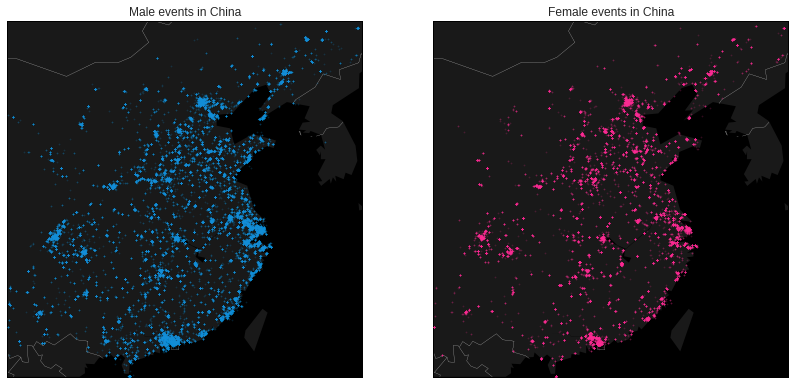

In [23]:
lon_min, lon_max = 100,130
lat_min, lat_max = 20,45

regionalGenderPlot(lat_min, lat_max, lon_min, lon_max)